<a href="https://colab.research.google.com/github/ameliavasiliu/DS3021_Final_Project/blob/main/Final_Project_Wrangling_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview and brief Data Summary and Expectations

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908 2.csv")

In [10]:
# getting an idea of what information out data contains
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


We aim to explore the Operator variable to see if certain types of operators are associated with more plane crashes. We will also examine if a particular type of plane results in more fatalities in a crash than others, and also identify the leading causes of crashes. Essentially, we want to explore whether certain flying conditions—such as the location, plane type, number of people aboard, etc.—are more dangerous for flying.

Additionally, a time series graph will be useful to examine if plane crash fatalities have increased or decreased over time. It could also be valuable to create a heatmap to identify any “hotspot” locations for crashes around the world.

Some challenges will arise with handling NaN values, especially in the flight number and registration variables. This means we will focus more on variables with more complete data. Identifying the cause of the crash will be tricky, as the Summary column contains free-text descriptions. We anticipate using code to extract certain patterns from the strings in the Summary field to get a sense of the leading causes of crashes. This will likely be the most challenging part, especially to ensure we don’t overlook any critical information when filtering.

In [ ]:
# removing columns that we don't need to use since most values are Nan and we aren't interested in exploring them
df = df.drop(columns=['Flight', 'Route', 'Registration', 'cn/In'])

# Basic EDA

In [12]:
pd.crosstab(df['Operator'], df['Fatalities'].sum())
# there seem to be a lot of operators, will have to clean and combine certain operators that are similar

col_0,105479.0
Operator,
A B Aerotransport,2
AB Aerotransport,3
ACES Colombia,3
ADC Airlines,2
ADES Colombia,2
...,...
Zantop Air Transport,4
Zantop Airways,1
Zantop International Airlines,1


In [13]:
pd.crosstab(df['Type'], df['Fatalities'].sum())
# again lots of rows need to clean, also doesn't appear to have a correlation?

col_0,105479.0
Type,
AAC-1 Toucan,1
AEGK,1
AT L98 Carvair,1
ATR 42-300,1
ATR-42-300,1
...,...
de Havilland Dove 1,2
de Havilland Dragon 1,1
de Havilland RU-6A Beaver /Bell UH-1H,1


In [15]:
# want to observe if plane crashes have increased over the years
df['Year'] = pd.to_datetime(df['Date']).dt.year
pd.crosstab(df['Year'], df['Fatalities'].sum())

col_0,105479.0
Year,
1908,1
1912,1
1913,3
1915,2
1916,5
...,...
2005,51
2006,49
2007,54


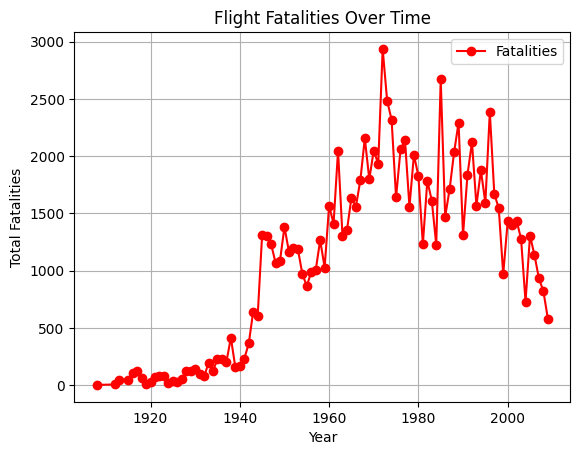

In [18]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce') # date-time format
df['Year'] = df['Date'].dt.year # extracting the year
fatalities_by_year = df.groupby('Year')['Fatalities'].sum() # group by year

plt.plot(fatalities_by_year, marker='o', linestyle='-', color='red', label='Fatalities') # simple graph to show trend
plt.title('Flight Fatalities Over Time')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.grid(True)
plt.legend()
plt.show()

Overall, we can conclude that a lot of our variables need heavy cleaning and grouping - specifically, the location, operator, plane type, and summary variables. By cleaning and grouping these variables we will be able to draw more significant conclusions and be able to cross tabulate variables more effectively to draw out potential patterns.